### Student Performance Prediction

In [207]:
import pandas as pd

In [208]:
# Loading the Dataset
df = pd.read_csv('../Student Performance Prediction/final_student_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,ExamScore,Result
0,1001,17,Male,Asian,Secondary,19.833723,7,1,Moderate,No,No,Yes,No,73.0,Pass
1,1002,18,Female,Asian,Primary,15.408756,0,0,Low,No,No,No,No,76.0,Pass
2,1003,15,Female,Hispanic,Higher Education,4.210570,26,0,Moderate,No,No,No,No,3.0,Fail
3,1004,17,Male,Asian,Higher Education,10.028829,14,0,High,Yes,No,No,No,51.0,Pass
4,1005,17,Male,Asian,Secondary,4.672495,17,1,High,No,No,No,No,32.0,Fail


In [209]:
# Checking the Data Types of Each Column
print("Data Types of Each Column:")
df.dtypes

Data Types of Each Column:


StudentID              int64
Age                    int64
Gender                object
Ethnicity             object
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport       object
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
ExamScore            float64
Result                object
dtype: object

In [210]:
# Checking for Missing Values
print("\nMissing Values in Each Column:")
df.isna().sum()


Missing Values in Each Column:


StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation    243
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport      212
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
ExamScore              0
Result                 0
dtype: int64

In [211]:
# Dropping Rows with Missing Values
print("\nDropping Rows with Missing Values:")    
df2 = df.dropna()
df2.isna().sum()


Dropping Rows with Missing Values:


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
ExamScore            0
Result               0
dtype: int64


Shape of DataFrame After Dropping Rows:


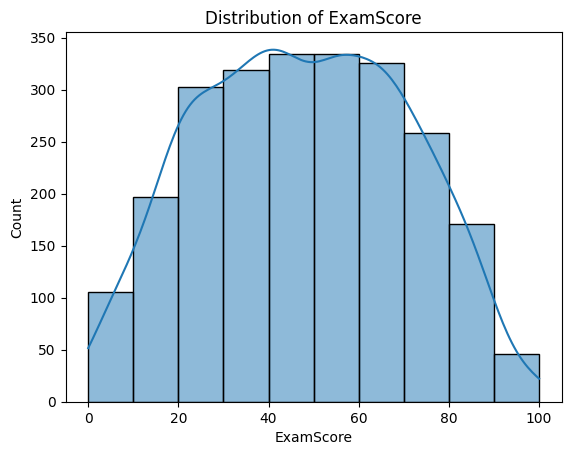

In [212]:
# Checking the Shape of the DataFrame After Dropping Rows
print("\nShape of DataFrame After Dropping Rows:")
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Histogram of scores
sns.histplot(df['ExamScore'], bins=10, kde=True)
plt.title('Distribution of ExamScore')
plt.xlabel('ExamScore')
plt.ylabel('Count')
plt.show()


Boxplot of ExamScore by Parental Education:


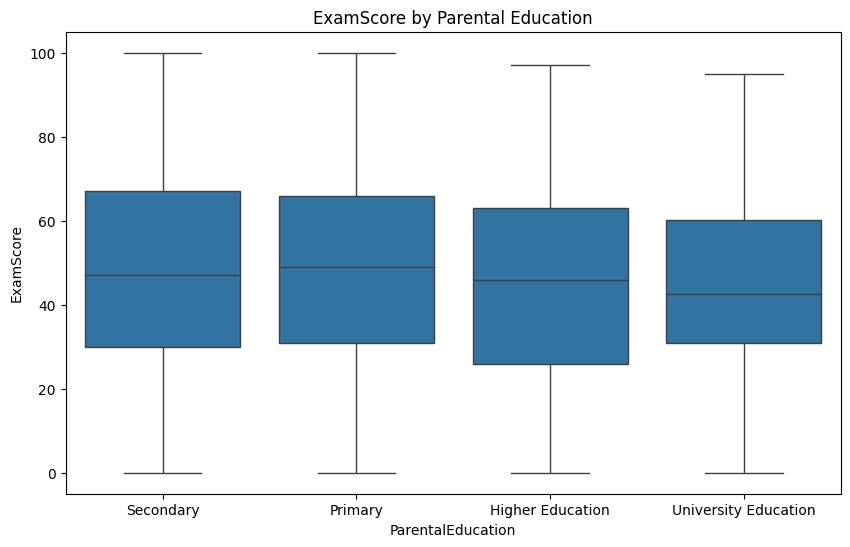

In [213]:
# Boxplot of scores by  Parental Education
print("\nBoxplot of ExamScore by Parental Education:")

plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalEducation', y='ExamScore', data=df)
plt.title('ExamScore by Parental Education')
plt.show()

In [214]:
# Preprocessing Categorical Features 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Result']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_x = transformer.fit_transform(df.drop('ExamScore', axis=1))
transformed_x


array([[ 0.        ,  1.        ,  1.        , ..., 19.83372281,
         7.        ,  1.        ],
       [ 1.        ,  0.        ,  1.        , ..., 15.40875606,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  4.21056977,
        26.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  6.80549964,
        20.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., 12.41665266,
        17.        ,  0.        ],
       [ 0.        ,  1.        ,  1.        , ..., 17.81990749,
        13.        ,  0.        ]])

In [215]:
pd.DataFrame(transformed_x)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1001.0,17.0,19.833723,7.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1002.0,18.0,15.408756,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1003.0,15.0,4.210570,26.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1004.0,17.0,10.028829,14.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1005.0,17.0,4.672495,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3388.0,18.0,10.680555,2.0,0.0
2388,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3389.0,17.0,7.583217,4.0,1.0
2389,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,3390.0,16.0,6.805500,20.0,0.0
2390,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,3391.0,16.0,12.416653,17.0,0.0


In [216]:
# Splitting the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['ExamScore']

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=42)



In [217]:
# Training the Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [218]:
# Making Predictions
print("\nMaking Predictions:")
y_pred = model.predict(x_test)
y_pred


Making Predictions:


array([ 36.12827831,  73.01883668,  47.56050332,  87.49072072,
         7.35354063,  68.08672779,  44.29988287,  60.11544843,
        55.06321737,  25.15343675,  63.45003933,  15.57400958,
        77.65589608,  69.06616783,  71.95638307,   9.03036236,
        26.51125187,  37.00607677,  53.02029462,  68.46106019,
        54.30514964,  39.65246057,  41.76562471,  82.0774236 ,
        43.66673983,  14.2932374 ,  40.3301061 ,  64.02864853,
        53.45918804,  47.94974795,  51.41660916,  18.58364541,
        75.59087056,  78.64589799,  35.49463366,  45.79690254,
        78.56277174,  72.85032498,  80.9140104 ,  19.6219744 ,
        69.05026586,  85.1502914 ,  27.82799493,  57.72802169,
        22.37265454,  66.55316515,  75.64321454,  27.12298132,
        70.54660517,  37.67586144,  77.54252755,  76.36444285,
        38.02559741,  28.86460383,  42.72218923,  85.8847452 ,
        62.43254875,  83.45951716,  24.93088826,  54.69898574,
        42.05482877,  49.85881357,  60.27802531,  35.37

In [219]:
# Evaluating the Model
from sklearn.metrics import r2_score, mean_squared_error

# R² Score
print("\nR² Score:")
r2 = r2_score(y_test,y_pred)
r2


R² Score:


0.9562789287883423

In [220]:
# Mean Squared Error
print("\nMean Squared Error:")
mse = mean_squared_error(y_test,y_pred)
mse


Mean Squared Error:


22.592135105473275

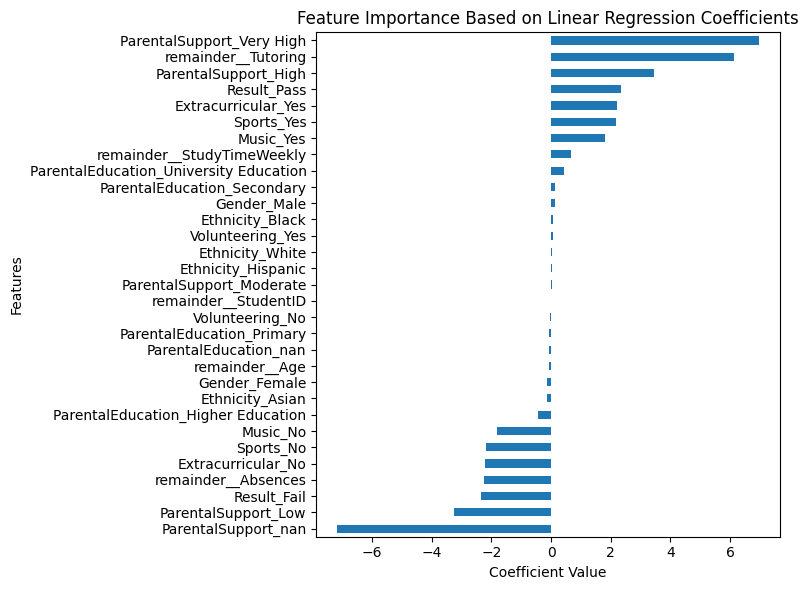

In [221]:
# Analyzing Feature Importance

# # After fitting the transformer
feature_names = transformer.get_feature_names_out()
cleaned_feature_names = [name.replace("one_hot__", "") for name in feature_names]

cofficients = pd.Series(model.coef_, index=cleaned_feature_names)
cofficients = cofficients.sort_values()


plt.figure(figsize=(8,6))
cofficients.plot(kind="barh")
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [222]:
# Saving the Model
import pickle 

pickle.dump(model, open("Student_Performance_Prediction_model_.pkl", "wb"))
loaded_model = pickle.load(open("Student_Performance_Prediction_model_.pkl","rb"))
loaded_model.score(x_test,y_test)

0.9562789287883423